In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [76]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



<IPython.core.display.Javascript object>

In [3]:
# list all files in data dir
glob.glob("data/*")

['data\\catdog.jpg', 'data\\catdog.png']

<IPython.core.display.Javascript object>

In [37]:
image_path = "data/catdog.png"
# Image is in BGR format in Open CV by default

# greyscale
# 0-255
image = cv2.imread(image_path)

<IPython.core.display.Javascript object>

In [5]:
image.shape

(1091, 920, 3)

<IPython.core.display.Javascript object>

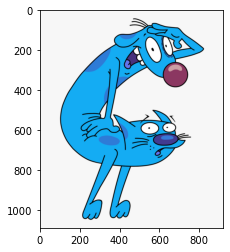

<IPython.core.display.Javascript object>

In [6]:
# colors are off because we are in BGR and mpl expects RBG
plt.imshow(image)
plt.show()

In [7]:
# TODO
# read
# display
# convert to grey
# convert RGB

# crop
# resize
# convert
# see
#flip
#look into: HSV/HSB(hue saturation brightness), LAB(luminocity , 

<IPython.core.display.Javascript object>

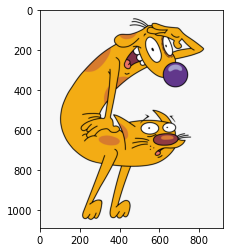

<IPython.core.display.Javascript object>

In [8]:
# Converting to display
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

(1091, 920)


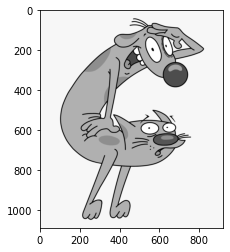

<IPython.core.display.Javascript object>

In [9]:
# weighted average of channels(green is more important to eye rods and stuff)
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(grey.shape)
plt.imshow(grey, cmap="gray")
plt.show()

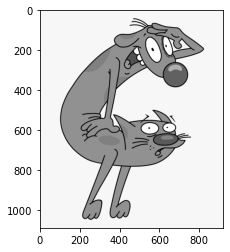

<IPython.core.display.Javascript object>

In [10]:
# manual greyscale taking uniformly weighted average
manual_grey = image.mean(axis=2)
plt.imshow(manual_grey, cmap="gray")
plt.show()

In [61]:
cropped = image[470:800, 360:750]
cropped.shape

(330, 390, 3)

<IPython.core.display.Javascript object>

In [62]:
def imshow_cv2plt(bgr_img):
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()

<IPython.core.display.Javascript object>

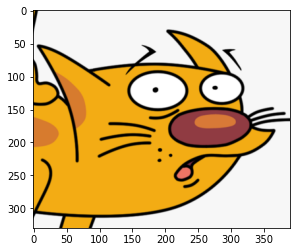

<IPython.core.display.Javascript object>

In [63]:
imshow_cv2plt(cropped)

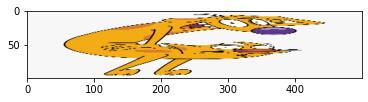

<IPython.core.display.Javascript object>

In [16]:
# def resize(img, width, height)
# resizing
width = 500
height = 200

resized = cv2.resize(image, (width, height))
imshow_cv2plt(resized)

In [19]:
h, w, = image.shape[:2]
(h, w)
ar = w / h
ar

0.843263061411549

<IPython.core.display.Javascript object>

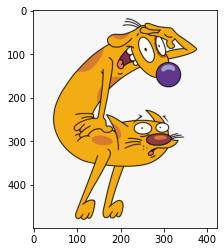

<IPython.core.display.Javascript object>

In [29]:
# known: w,h,either new_h/new_w
# w/h = new_width/hew_height


def resize(img, width=None, height=None):
    h, w = img.shape[:2]

    if width is not None and height is not None:
        pass
    if width is not None:
        height = width * (h / w)
        height = round(height)
    elif new_h is not None:
        width = height * (w / h)
        width = round(width)
    else:
        ValueError("No dimensions provided")

    resized = cv2.resize(image, (width, height))
    return resized


resized = resize(image, height=500)
imshow_cv2plt(resized)

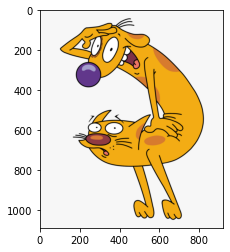

<IPython.core.display.Javascript object>

In [30]:
#flip on y axis
image = cv2.flip(image, 1)
imshow_cv2plt(image)

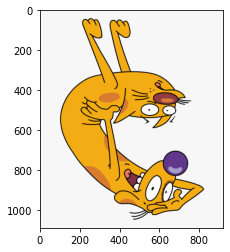

<IPython.core.display.Javascript object>

In [35]:
# flip on X axis
image = cv2.flip(image, 0)
imshow_cv2plt(image)

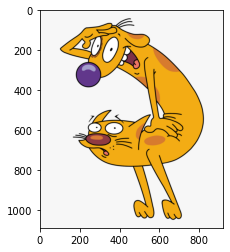

<IPython.core.display.Javascript object>

In [36]:
#flips on both axes
image = cv2.flip(image, -1)
imshow_cv2plt(image)

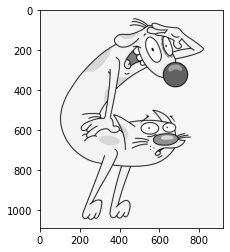

<IPython.core.display.Javascript object>

In [38]:
b, g, r = cv2.split(image)

plt.imshow(r, cmap="gray")
plt.show()

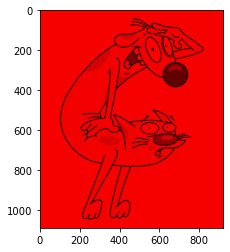

<IPython.core.display.Javascript object>

In [39]:
red = image.copy()
red[:, :, :2] = 0


red = image.copy()
red[:, :, :2] = 0



green = image.copy()
green[:, :, 0] = 0
green
imshow_cv2plt(red)

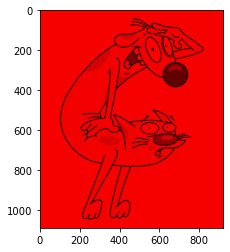

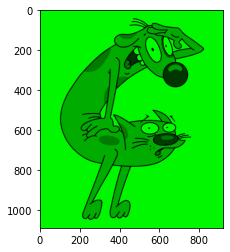

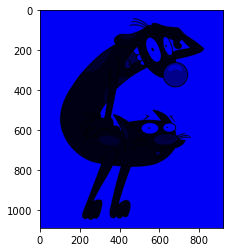

<IPython.core.display.Javascript object>

In [118]:
# This cant be best practice, look up a better way it you want to do this
red = image.copy()
# zero out blue/green channels
red[:, :, :2] = 0
imshow_cv2plt(red)

green = image.copy()
# zero out blue/red channels
green[:, :, 0] = 0
green[:, :, 2] = 0
imshow_cv2plt(green)

blue = image.copy()
# zero out green/red channels
blue[:, :, 1:] = 0
imshow_cv2plt(blue)

In [105]:
darken = image.copy()
darken = np.clip(darken[470:800, 360:750], 0, 25)
darken.shape


(330, 390, 3)

<IPython.core.display.Javascript object>

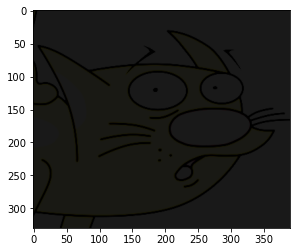

<IPython.core.display.Javascript object>

In [106]:
imshow_cv2plt(darken)

In [103]:
bright = image.copy()
bright = np.clip(bright[470:800, 360:750], 155, 255)
bright.shape

(330, 390, 3)

<IPython.core.display.Javascript object>

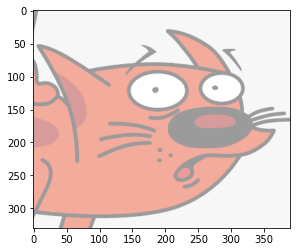

<IPython.core.display.Javascript object>

In [104]:
imshow_cv2plt(bright)

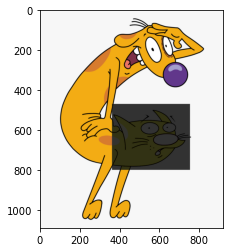

<IPython.core.display.Javascript object>

In [167]:
cat_dark = image.copy()
# darken area around cat
cat_dark[470:800, 360:750, 0:3] = np.clip((cat_dark[470:800, 360:750, 0:3]), 0, 50)
# test = np.clip(test[470:800, 360:750, 0:2] - 355, 0, 255)
imshow_cv2plt(cat_dark)

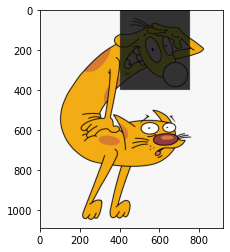

<IPython.core.display.Javascript object>

In [169]:
dog_dark = image.copy()
# darken area around dog
dog_dark[0:400, 400:750, 0:3] = np.clip((dog_dark[[0:400, 370:750, 0:3]), 0, 50)
imshow_cv2plt(dog_dark)

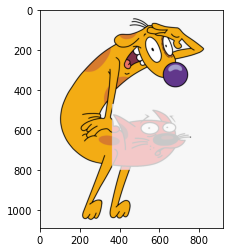

<IPython.core.display.Javascript object>

In [172]:
cat_light = image.copy()
# lighten area around cat
cat_light[470:800, 360:750, 0:3] = np.clip((cat_light[470:800, 360:750, 0:3]), 200, 250)
imshow_cv2plt(cat_light)

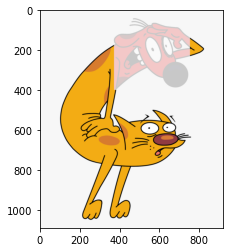

<IPython.core.display.Javascript object>

In [177]:
dog_light = image.copy()
# lighten area around cat
dog_light[0:400, 370:750, 0:3] = np.clip((dog_light[0:400, 370:750, 0:3]), 200, 250)
imshow_cv2plt(dog_light)